# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [3]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [4]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [5]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# read the data
data = pd.read_csv('/content/drive/MyDrive/dataset/foodhub_order.csv')
df=data.copy()

In [11]:
# view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [12]:
# Shape of dataset
df.shape

(1898, 9)

#### Observations:
The Dataset has 1898 number of rows with 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [13]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
*   We can observe that there around 4 object datatype and 5 numerical datatype.
*   There are no null values present in the dataset.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [14]:
# checking missing values
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
There are are no missing values present in the variable.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [15]:
# statistical data summary
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:
The above table displays the descriptive analysis for Numerical columns

* `Food Preparation time:` The minimum time it takes for food to be prepared once an order is placed is 20 minutes, averagely 27 minutes, and the maximum time is 35 minutes.
*  `Cuisine type:` There are 14 different types of cuisine, the highest being American cuisine with a frequency of 584.
*   `Rating:`The ratings are usually done in four categories, which is not usual given my most orders.
*   `Delivery time:`The maximum time it takes orders to be delivered is 33 minutes, averagely at 24 minutes, and minimum at 15 minutes.
*   `Day of the week:`The orders are usual high during the weekends at about 71% compared to weekdays.
*   `Cost of the order:`The cost of orders varies, with the highest at 35.41 dollars, the minimum at 4.47 dollars, and averagely at 16.5 dollars.
*   `restaurant name:`There are 178 restaurants that serve the aggregator company FoodHub.

### **Question 5:** How many orders are not rated? [1 mark]

In [16]:
# checking counts for rating
df['rating'].value_counts(ascending=True)

,count
rating,
3,188
4,386
5,588
Not given,736


#### Observations:
There are 736 that are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

Order ID

In [17]:
# Checking numbers of unique order IDs
df['order_id'].nunique()

1898

 #### Observations:
 There are a total of 1898 different order IDs in the data.

Customer ID

In [18]:
# Checking numbers of unique customer IDs
df['customer_id'].nunique()

1200

#### Observations:
There are a total of 1200 different customer IDs in the data.

Restaurant name

In [19]:
# Checking numbers of unique Restaurant names
df['restaurant_name'].nunique()

178

#### Observations:
There are a total of 178 different types of restaurant names in the data.

Cuisine type

In [ ]:
# Checking numbers of unique cuisine types
df['cuisine_type'].nunique()

14

#### Observations:
There are a total of 14 different types of cuisine in the data.

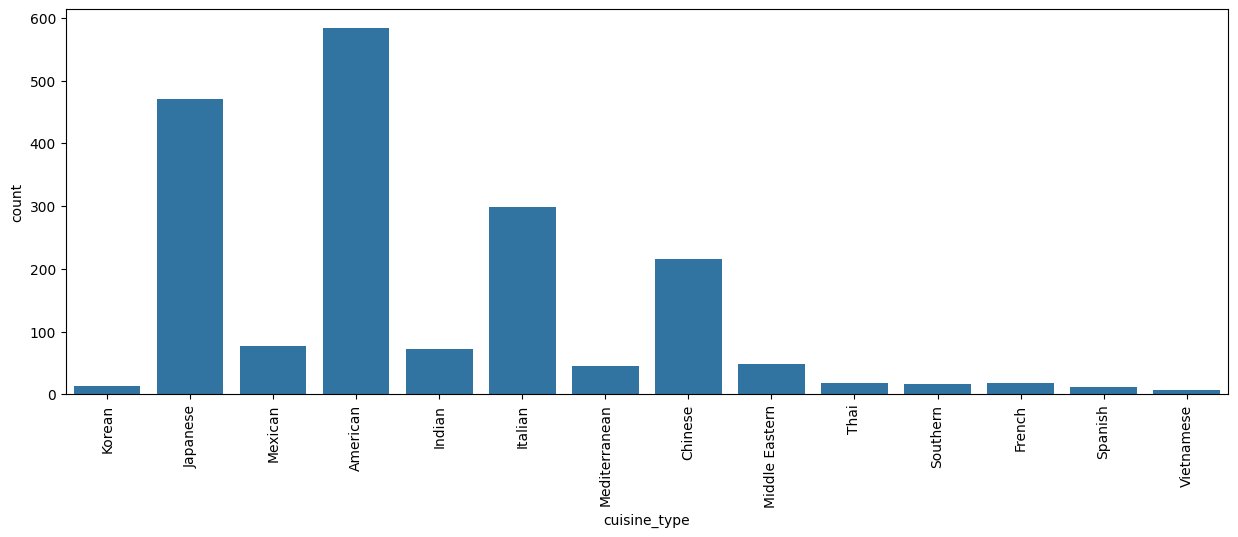

In [20]:
# @title cuisine_type
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type');
plt.xticks(rotation = 90);

**Observation on cusine_type**


*   The most highly ordered cuisine is American, Japanese, Italian, and Chinese
*   The less minimum-ordered cuisines are the Korean, Thai, southern, French, Spanish, and Vietnamese.


Cost of the order


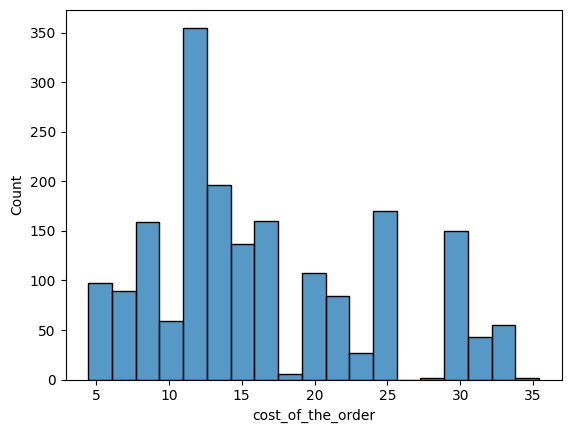

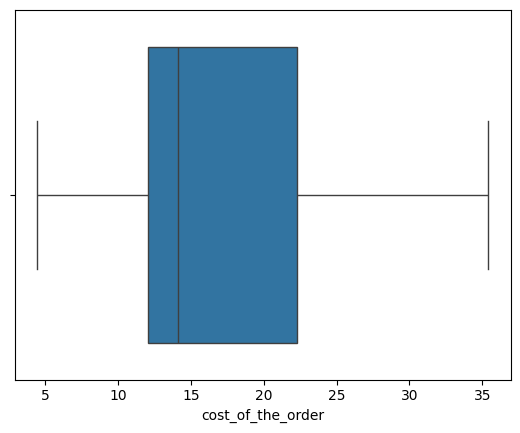

In [21]:
# @title cost_of_the_order
sns.histplot(data=df,x='cost_of_the_order')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

**Observation on cost_of_the_type**


*   The distribution is right-skewed.
*   The highest cost of an order is between 11 and 12 dollars.

Day of the week

In [22]:
# Checking unique day of the week
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

#### Observations:
The days of the week are categorized into two categories: weekends (Saturday and Sunday) and weekdays (Monday, Tuesday, Wednesday, Thursday, and Friday).

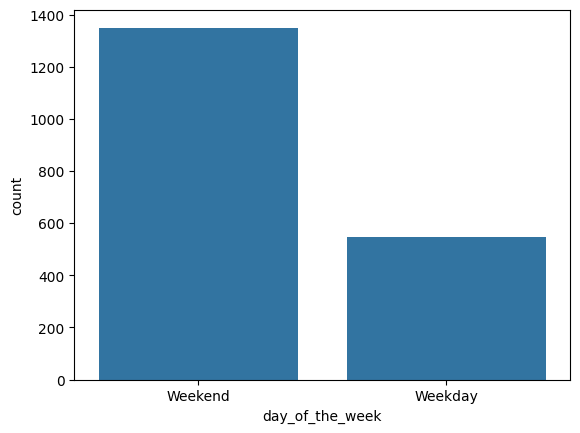

In [23]:
# @title day_of_the_week
sns.countplot(data = df, x = 'day_of_the_week');

**Observation on day_of_the_week**


*   Most of the orders are made during the weekends with about 71% rather than during the weekdays having about 28%.


Rating

In [24]:
# Checking unique rating
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

#### Observations:
The ratings are categorized into 4 as (not given, 5, 4, and 3).

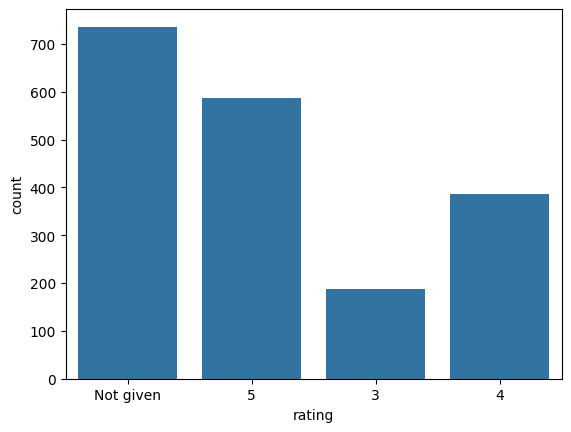

In [25]:
# @title rating
sns.countplot(data = df, x = 'rating');


**Observation on rating**


*   The highest rating observed is not given on orders. However, if rated, it is mostly rated at 4 or 5.



Food Preparation time

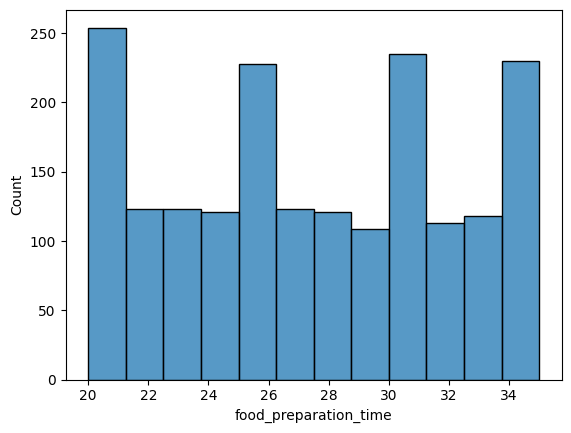

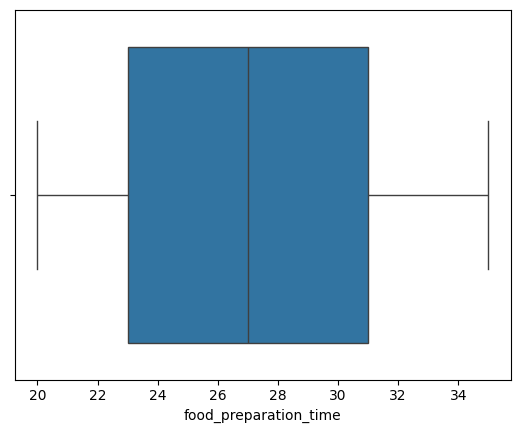

In [26]:
# @title food_preparation_time
sns.histplot(data=df,x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

**Observation on food_preparation_time**


*  The distribution shows multiple peaks and drops around the food preparation time.
*   TThe boxplot confirms this, with a median preparation time of around 27 minutes.

Delivery time

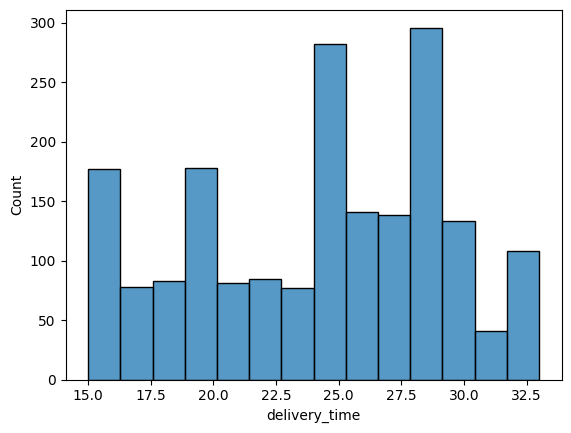

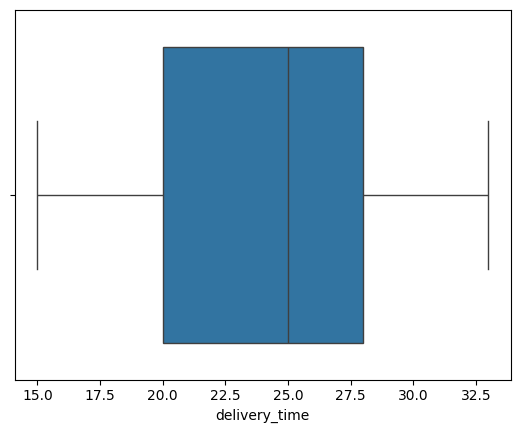

In [27]:
# @title delivery_time
sns.histplot(data=df,x='delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

**Observation on delivery_time**



*   The histogram of delivery times shows a slight right skew.
*   Most of the delivery time are on the higher side.



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [28]:
# Checking total counts for the top restaurants
df['restaurant_name'].value_counts().head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
The top 5 restaurants are:

*   Shake Shack	219
*  The Meatball Shop	132
*   Blue Ribbon Sushi	119
*   Blue Ribbon Fried Chicken	96
*   Parm	68










### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [29]:
#  Checking the most popular for weekend
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].unique()

array(['Korean', 'Japanese', 'American', 'Italian', 'Mexican',
       'Mediterranean', 'Chinese', 'Indian', 'Thai', 'Southern', 'French',
       'Spanish', 'Middle Eastern', 'Vietnamese'], dtype=object)

#### Observations:
The most popular cusine on weekends are Korean, Japanese, American, Italian, mexican, Mediterranean, Chinese, Indian, Thai, Southern, Frenchc, Spanish, Middle Eastern and Vietnamese.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [30]:
# checking percentage order cost more than 20 dollars
df_greater_than_20 = df[df['cost_of_the_order'] > 20]
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

percentage = (len(df_greater_than_20) / len(df)) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


#### Observations:
*   There is 29 percent of the orders cost more than 20 dollars.
*  The total number of orders above 20 dollars is 555.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [31]:
# checking the mean delivery order
mean_delivery_time = df['delivery_time'].mean()
print('The mean delivery time for this dataset is', round(mean_delivery_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


#### Observations:
The mean order delivery time is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [32]:
# checking 20% discount for three most frequent customers
customer_orders = df.groupby('customer_id')['order_id'].count()
top_customers = customer_orders.sort_values(ascending=False)
top_3_customers = top_customers.head(3)
print(top_3_customers)

customer_id
52832    13
47440    10
83287     9
Name: order_id, dtype: int64


#### Observations:
The top 3 most frequent customers with IDs and number of orders are:

*  52832	- 13
*  47440	- 10
*  83287	- 9


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


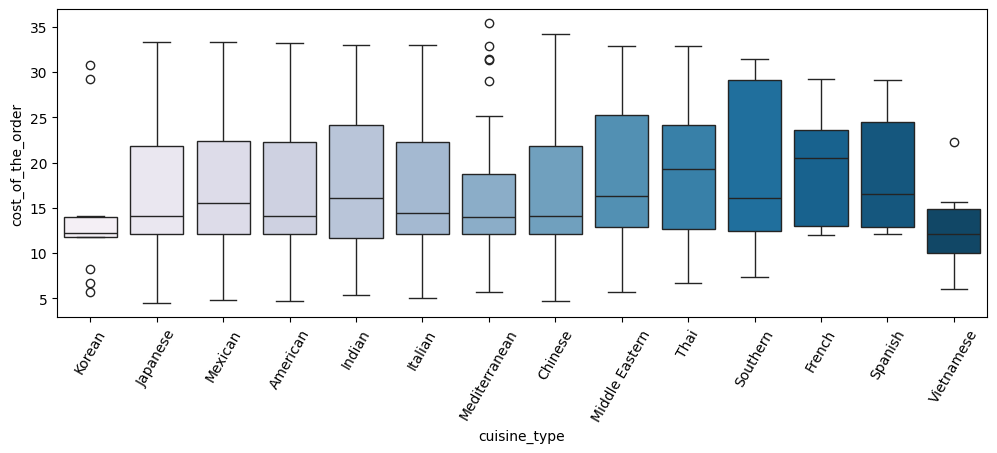

In [35]:
# @title Relationship between cost_of_the_order & cuisine_type
plt.figure(figsize=(12,4))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

#### Observations:



*   There are outliers in this data in Korean, Mediterranean and vietnamese cuisine.
*   We can observe that there cost of orders above 25 dollars are middle Eastern and Southern cuisine.



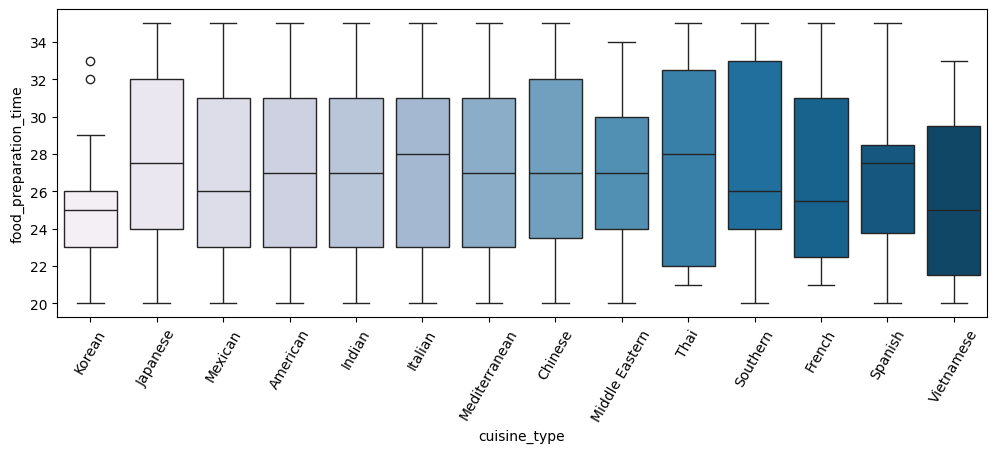

In [36]:
# @title Relationship between food_preparation_time & cuisine_type
plt.figure(figsize=(12,4))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

#### Observations:


*   The lowest food preparation time is Korean, with few outliners indicated.
*   We can observe that most food prepared averagely above 26 minutes for almost all the cuisine.


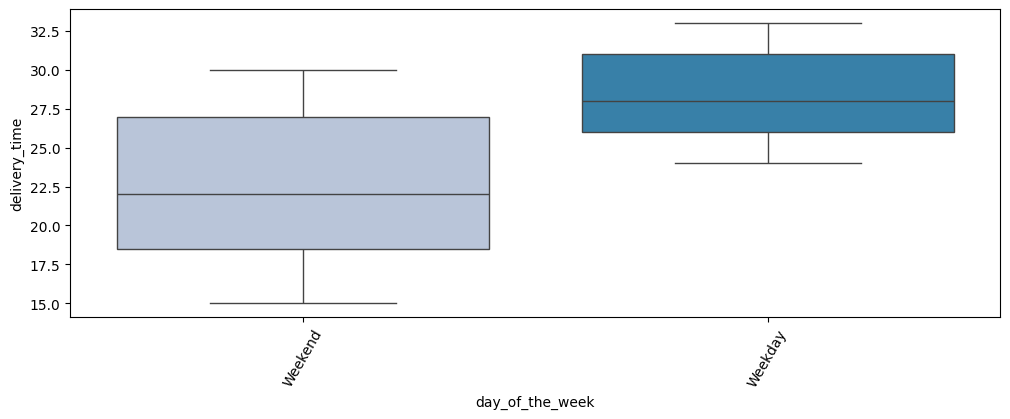

In [37]:
# @title Relationship between day_of_the_week & delivery_time
plt.figure(figsize=(12,4))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu', hue = "day_of_the_week")
plt.xticks(rotation = 60)
plt.show()

#### Observations:



*   The delivery time during the weekends is around 27 minutes, and for the weekdays it is higher at above 30 minutes.


The revenue generated by the restaurants

In [ ]:
# grouping by restaurant name and cost of the order
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

#### Observations:



*   The restaurant with the highest revenue generated is Shake Shack with 3579.53 cost of orders; the lowest is Five Guys Burgers and Fries with 506.47 cost of orders.
*  It observed reveneue generated from 14 different restaurants.



Rating vs Delivery time

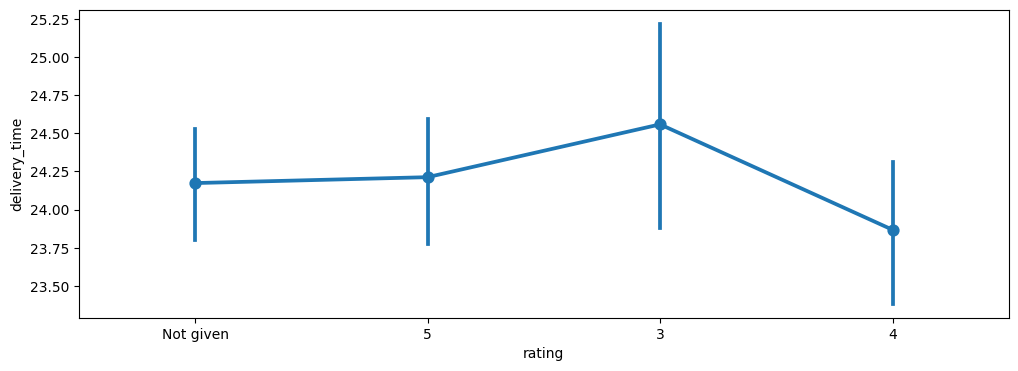

In [38]:
# Relationship between rating and delivery time
# @title Relationship between rating and delivery time
plt.figure(figsize=(12, 4))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

#### Observations:


*   The delivery time and rating at the highest in the 3rd rating. then followed by the not given rating and 5th rating.
*   The lowest of the delivery time and rating is the 4th rating.

Rating vs Food preparation time

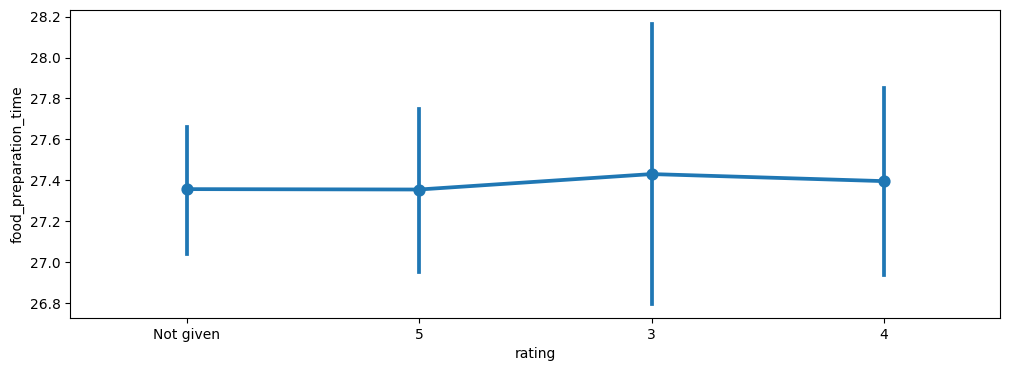

In [39]:
# Relationship between rating and food preparation time
# @title Relationship between rating and food preparation time
plt.figure(figsize=(12, 4))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

#### Observations:



*  It is observed that the food preparation time and rating at the highest pick in the 3rd rating



Rating vs Cost of the order

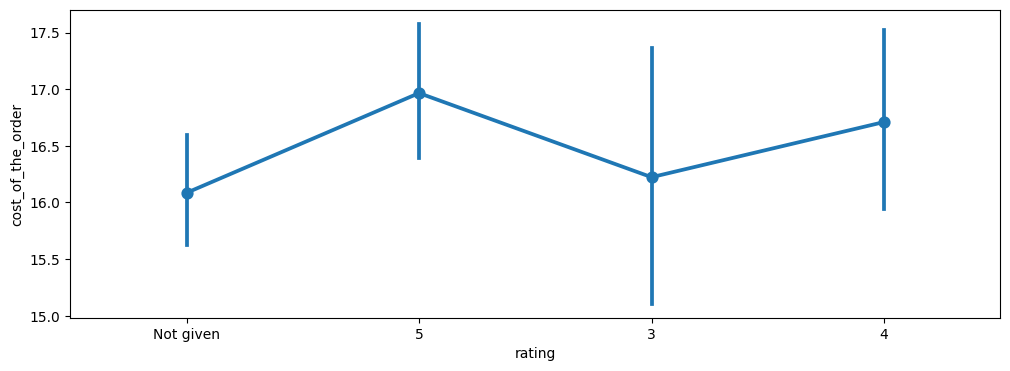

In [40]:
# Relationship between rating and cost of the order
# @title Relationship between rating and cost of the order
plt.figure(figsize=(12, 4))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()

#### Observations:



*   It can be observed in the ratings in all categories: a drop in the Not Given and 4 ratings, then picked in the 5 rating and the 3 ratings for the cost of the order.



Correlation among variables

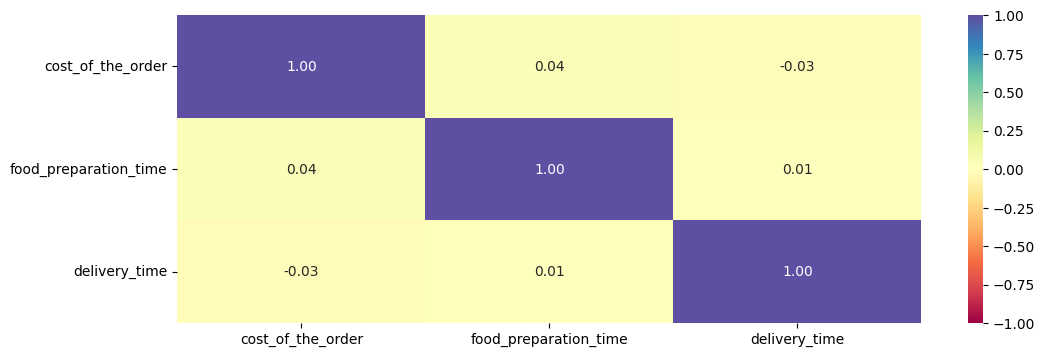

In [42]:
# Plot the heatmap
# @title correlation cost of the order, food preparation time and delivery time
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(12, 4))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observations:


*   Cost of the other and Delivery time have a strong correlation with each other.
*   There is no such relationship between any of the other variables.



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating']> 50]['restaurant_name']

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4_rating = df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()

# filter for average rating greater than 4
df_avg_rating_greater_than_4 = df_mean_4_rating[df_mean_4_rating['rating'] > 4].sort_values(by='rating', ascending=False).reset_index(drop=True)

df_avg_rating_greater_than_4

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:

*   The restaurants with a rating count of more than 50 and an average rating greater than 4 are The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, and Blue Ribbon Sushi.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# create a funtion for cost and order
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)  # Apply the function to the 'cost' column

# Calculate net revenue
net_revenue = df['Revenue'].sum()

print("The net revenue generated by the company is: $", net_revenue)

# get the total revenue and print it
total_rev = df['Revenue'].sum()  # get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue generated by the company is: $ 6166.303
The net revenue is around 6166.3 dollars


#### Observations:
The net revenue generated by the company across is 6166.3 dollars

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Calculate total delivery time and add a new column
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate the percentage of orders taking more than 60 minutes
percentage_over_60 = (df['total_time'] > 60).mean() * 100

# Print the result
print(f"Percentage of orders taking more than 60 minutes: {percentage_over_60:.2f}%")

Percentage of orders taking more than 60 minutes: 10.54%


#### Observations:
The percentage of orders taking more than 60 minutes: 10.54%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Get the mean delivery time on weekdays
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


# get the mean delivery time on weekends
print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
      'minutes')

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


#### Observations:
The mean delivery time, respectively, for weekdays is 28 minutes and weekends is 22 minutes.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
Based on the analysis of the FoodHub data, here are some key conclusions.

1.   Popular Restaurants and Cuisines:

* Certain restaurants and cuisine types are more popular than others. For instance, Shake Shack restaurants may dominate the number of orders, indicating strong customer preference and high revenue generated.

* Certain cuisines, like American and Chinese, are more frequently ordered, especially during weekends.

2. Customer Ratings:
* There is a correlation between the cost of the order and the customer rating; priced meals generally receive better ratings.

*   The restaurants with a rating count of more than 50 and an average rating greater than 4 are The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, and Blue Ribbon Sushi.

3.  Order & Timing:
*   Weekdays have lower order volumes, which still have longer delivery times and slightly lower ratings.

*   Most of the orders are made during the weekends with about 71% rather than during the weekdays having about 28%.

*   The mean delivery time, respectively, for weekdays is 28 minutes and weekends is 22 minutes.

4.  Revenue:
*   The restaurant with the highest revenue generated is Shake Shack with 3579.53 cost of orders; the lowest is Five Guys Burgers and Fries with 506.47 cost of orders.

5.  Food preparation:
*   The lowest food preparation time is Korean, with few outliners indicated.
*   We can observe that most food prepared averagely above 26 minutes for almost all the cuisine.










### Recommendations:

*  Expand Partnerships: Consider partnering with more restaurants that offer popular cuisine types (e.g., American, Japanese, Italian, Chinese). This will cater to customer preferences and potentially increase order volumes.

*   Optimize Delivery Routes: Invest in better route optimization technology or AI-driven dispatch systems to reduce delivery times, especially during peak hours on weekends.

*   Reward High Ratings: Offer rewards or discounts to restaurants that consistently achieve high ratings, incentivizing them to maintain quality service.

*   Pre-order Options: Introduce a pre-order option for weekends where customers can order in advance, allowing better resource planning for restaurants.

*   Incorporate Feedback Mechanisms: After identifying trends from customer feedback, work closely with restaurants to address common complaints (e.g., food quality, packaging issues).

*   Restaurant Efficiency Programs: Work with partner restaurants to streamline their order preparation processes. This might involve advising on kitchen workflows or even offering incentives for faster preparation times.







In [ ]:
!pip install nbconvert

In [ ]:
!jupyter nbconvert --to html /content/your_notebook.ipynb

[NbConvertApp] WARNING | pattern '/content/your_notebook.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--

---